# Project: Wrangling and Analyze Data

In [1]:
#import all the needed library
import pandas as pd
import numpy as np
import requests
import os
import tweepy
import json
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
#read the data by pandas
RatingDogs_df = pd.read_csv('WeRateDogs_data/twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
#Download a file by using request
folder_name = 'WeRateDogs_data'
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open(os.path.join(folder_name, url.split('/')[-1]), mode='wb') as file:
          file.write(response.content)

In [4]:
#read the saved  by pandas
DogsBreeds_df = pd.read_csv('WeRateDogs_data/image-predictions.tsv', sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

#### Udacity given code:

In [ ]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = RatingDogs_df.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open(os.path.join(folder_name,'tweet_json.txt'), 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


#### My code version:

In [ ]:
#developer authentication data
api_key= ''
api_secret= ''
access_token= ''
access_secret= ''

#authenticate to twitter
auth = tweepy.OAuthHandler(api_key,api_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

tweets_ids= twitter_arch_df['tweet_id']

json_tweets = [] #used to save all tweets' objects 
failed_tweets = {} #used to track failed tweets extraction 

#extract all tweets' objects and save them in json format
for tweet_id in tweets_ids:
    try:
        tweet = api.get_status(tweet_id)
        json_tweets.append(tweet._json)
    except tweepy.TweepError as e:
        failed_tweets[tweet_id] = e
        print(tweet_id +':'+ e)

#save json tweets as tweet_json.txt
with open(os.path.join(folder_name, 'tweet_json.txt'), mode='w') as json_file:
    json.dump(json_tweets, json_file)

In [6]:
#read json into pandas dataframe
tweetsData_df = pd.read_json('WeRateDogs_data/tweet-json.txt', lines =True)

#fetching the required data: tweet id, favorite count, and retweet count.
tweetsData_df = tweetsData_df.loc[:,['id_str','favorite_count','retweet_count']]

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### Visual Assessment:

In [7]:
#display RatingDogs dataframe
RatingDogs_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [8]:
#display DogsBreeds dataframe
DogsBreeds_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [9]:
#display DogsBreeds dataframe
tweetsData_df

,id_str,favorite_count,retweet_count
0,892420643555336192,39467,8853
1,892177421306343424,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774
...,...,...,...
2349,666049248165822464,111,41
2350,666044226329800704,311,147
2351,666033412701032448,128,47
2352,666029285002620928,132,48


At glance,we have identified the following:
<br><br><b>RatingDogs DataFrame:</b>
<ul>
    <li>RatingDogs_df: dogge, floofer, pupper, puppo columns are values not variable, so they sould be in one column</li>
    <li>RatingDogs_df: name, dogge, floofer, pupper, puppo columns have none value as indicator of null  </li>
    <li>RatingDogs_df: the name column doesn't has the right extracted value for some rows where it has 'a' instead of name</li>
</ul>
<br><b>DogsBreeds DataFrame:</b>
<ul>
    <li>DogsBreeds_df: Not all the predictions are a dog breed</li>
    <li>DogsBreeds_df: There's multipule breed prediction with verious confidence for each dog</li>
</ul>
<br><b>tweetsData DataFrame:</b>
<ul>
    <li>tweetsData_df:the data need to be merged with RatingDogs_df</li>
</ul>

### Programmatic Assessment:

In [10]:
#check the number of rows, data types, number of nulls value, and number of retweeted tweets
RatingDogs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [11]:
#check the retweeted tweets and assure if they are duplicated or from other users
RatingDogs_df.query('retweeted_status_id.notnull()', engine='python')['text'] 

#we add engine='python' if neccessry here i didn't need to but at udacity jupytor

19      RT @dog_rates: This is Canela. She attempted s...
32      RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...
36      RT @dog_rates: This is Lilly. She just paralle...
68      RT @dog_rates: This is Emmy. She was adopted t...
73      RT @dog_rates: Meet Shadow. In an attempt to r...
                              ...                        
1023    RT @dog_rates: This is Shaggy. He knows exactl...
1043    RT @dog_rates: Extremely intelligent dog here....
1242    RT @twitter: @dog_rates Awesome Tweet! 12/10. ...
2259    RT @dogratingrating: Exceptional talent. Origi...
2260    RT @dogratingrating: Unoriginal idea. Blatant ...
Name: text, Length: 181, dtype: object

In [13]:
#check if there's any duplicated tweets based on text and urls attached to it
RatingDogs_df.duplicated(subset=['text', 'expanded_urls']).sum()

0

In [14]:
#check if there's any outliers or unusual data
RatingDogs_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [15]:
#check dominator with the outliers since it's supposed to be 10
pd.set_option('display.max_colwidth', 100) #to increase text column length
RatingDogs_df.query('rating_denominator !=10').loc[:,['text', 'rating_numerator','rating_denominator']]

,text,rating_numerator,rating_denominator
313,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0
342,@docmisterio account started on 11/15/15,11,15
433,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
516,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clickin...,24,7
784,"RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search ...",9,11
902,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
1068,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our se...",9,11
1120,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at onc...,204,170
1165,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
1202,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 ht...,50,50


In [16]:
#check how much percentage of the data has a rating_denominator that equal 10
RatingDogs_df.query('rating_denominator==10')['rating_denominator'].count()/RatingDogs_df.shape[0]

0.9902376910016978

In [17]:
#check how many rows that its rating_denominator not equal 10
RatingDogs_df.query('rating_denominator !=10')['tweet_id'].count()

23

In [18]:
#check how many rows that actually has a value in one of dog stages columns (doggo, floofer ..etc)
RatingDogs_df.query('doggo != "None" or floofer != "None" or pupper != "None" or puppo != "None"')['tweet_id'].count()

380

In [19]:
#get all the rows that don't have a dog stage value
No_DogStage = RatingDogs_df.query('doggo == "None" and floofer == "None" and pupper == "None" and puppo == "None"')
#check if there's unextracted values in these rows
test = No_DogStage['text'].str.lower().str.extract(r'(?P<doggo>doggo)|(?P<floofer>floofer)|(?P<pupper>pupper)|(?P<puppo>puppo)')
test.count()

doggo      10
floofer     0
pupper     26
puppo       7
dtype: int64

In [22]:
#increase the number of displayed values
pd.set_option('display.max_rows', 50)
#checking the name of the dogs if it has more cases like "a" or other characters
RatingDogs_df['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [23]:
#check the number of rows, data types, number of nulls value
DogsBreeds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [24]:
#check if there's any outliers or unusual data
DogsBreeds_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [25]:
#check if there's any duplicated tweets based on img urls, img_num, and predictions
DogsBreeds_df.duplicated(subset=['jpg_url','img_num','p1','p2','p3']).sum()

66

In [26]:
#check the number of rows that none of its predictions are a dog breed
DogsBreeds_df.query('p1_dog == False and p2_dog == False and p3_dog == False')['tweet_id'].count()

324

In [27]:
#check how many predections are not dogs breeds
DogsBreeds_df[['p1','p2','p3']].apply(pd.Series.value_counts).sort_values(by=['p1','p2','p3'])

,p1,p2,p3
bannister,1.0,1.0,1.0
bib,1.0,1.0,1.0
boathouse,1.0,1.0,1.0
bow,1.0,1.0,1.0
canoe,1.0,1.0,1.0
...,...,...,...
squirrel_monkey,NaN,NaN,2.0
titi,NaN,NaN,2.0
wreck,NaN,NaN,2.0
echidna,NaN,NaN,3.0


In [28]:
#check the number of rows, data types, number of nulls value
tweetsData_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id_str          2354 non-null   int64
 1   favorite_count  2354 non-null   int64
 2   retweet_count   2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [29]:
#check if there's any outliers or unusual data
tweetsData_df.describe()

,id_str,favorite_count,retweet_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,8080.968564,3164.797366
std,6.852812e+16,11814.771334,5284.770364
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,1415.000000,624.500000
50%,7.194596e+17,3603.500000,1473.500000
75%,7.993058e+17,10122.250000,3652.000000
max,8.924206e+17,132810.000000,79515.000000


In [30]:
#check if there's any duplicates
tweetsData_df.duplicated().sum()

0

<br><b>RatingDogs DataFrame:</b>
<ul>
    <li>RatingDogs_df: data type of tweet id is integer not a string</li>
    <li>RatingDogs_df: data type of timestamp is string not a datetime</li>
    <li>RatingDogs_df: data type of in_reply_to_status_id and in_reply_to_user_id is float not a string</li> 
    <li>RatingDogs_df: there are 181 retweeted tweets, which they are a duplicated tweets not original tweet or from another users</li>
    <li>RatingDogs_df: there's 23 records with rating_denominator that is larger or smaller than 10, some of them is a true rating and others doesn't has the right rating extraction</li>
    <li>RatingDogs_df: most of the rows don't have a dog stage values, but i found out there's a number of values haven't been extracted</li>
    <li>RatingDogs_df: the name column has values that is not a name such as: a, an, the, and none as indicator of null</li>
</ul>


<b>DogsBreeds DataFrame:</b>
<ul>
    <li>DogsBreeds_df: there's missing data since there's only 2075 rows, while the tweet rate dataframe has 2356</li>
    <li>DogsBreeds_df: tweet id is integer not a string</li>
    <li>DogsBreeds_df: There's a 66 duplicated rows</li>
    <li>DogsBreeds_df: There's a lot of predictions that are not a dog breed and 324 rows don't have any dog breed prediction</li>
</ul>
<br><b>tweetsData DataFrame:</b>
<ul>
    <li>tweetsData_df:there's 2 missing rows since there's only 2354 rows, while the tweet rate dataframe has 2356</li>
    <li>tweetsData_df: tweet id is integer not a string</li>
</ul>

<b>For the purpose of this project, I'll solve the following issues:</b>

### Quality issues
1.RatingDogs_df: there are 181 retweeted tweets, which they are a duplicated tweets not original tweet or from another users

2.RatingDogs_df: there's 23 records with rating_denominator that is larger or smaller than 10, some of them is a true rating and others doesn't has the right rating extraction

3.RatingDogs_df: name, dogge, floofer, pupper, puppo columns have none value as indicator of null

4.RatingDogs_df: most of the rows don't have a dog stage values, but i found out there's a number of values haven't extracted

5.RatingDogs_df: the name column has values that is not a name such as: a, an, the, and none as indicator of null

6.DogsBreeds_df: There's a 66 duplicated rows

7.DogsBreeds_df: There's a lot of predictions that are not a dog breed and 324 rows don't have any dog breed prediction

8.The datatype of ids and timestamp are not correct in all the datasets

### Tidiness issues
1.RatingDogs_df: dogge, floofer, pupper, puppo columns are values not variable, so they should be in one column

2.DogsBreeds_df: There's multipule breed prediction with verious confidence for each dog

3.the 3 datasets need to be mereged since all of them about the same thing which is the dog.

In [31]:
#reset pandas setting to the default
pd.reset_option('display.max_rows')
pd.reset_option('display.max_colwidth')

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [32]:
# Make copies of original pieces of data
RatingDogs_clean = RatingDogs_df.copy()
DogsBreed_clean = DogsBreeds_df.copy()
tweetsData_clean = tweetsData_df.copy()

### Issue #1: RatingDogs_df: there are 181 retweeted tweets

#### Define:  drop all the retweeted tweets by using drop() function.

#### Code

In [33]:
#getting the index of all the retweeted tweets
droped_index = RatingDogs_clean.query('retweeted_status_id.notnull()').index
#drop rows based on index
RatingDogs_clean.drop(droped_index, inplace=True)

#### Test

In [34]:
#check if there's any retweeted tweets
RatingDogs_clean.query('retweeted_status_id.notnull()')['retweeted_status_id'].count()

0

### Issue #2: RatingDogs_df: there's 23 records with rating_denominator that is larger or smaller than 10, some of them is a true rating and others doesn't has the right rating extraction

#### Define: since 99% of the rating dominator is 10 we will make it our standard value to extract the right rating by using regex and str.extract function, after that we will drop all the outliers since they will affect the analysis by using drop function

#### Code

In [35]:
#getting all the rows with rating_denominator that is not 10
wrong_rating = RatingDogs_clean[RatingDogs_clean['rating_denominator']!=10]
#extracting the rating from the rows based on our standard value >> 10
extracted_rating = wrong_rating['text'].str.extract(r'(?P<rating_numerator>\d+)/(?P<rating_denominator>10)')

#assign the right values to the RatingDogs_clean dataframe
for i, row in extracted_rating.iterrows():
    
    RatingDogs_clean.loc[i,'rating_numerator'] = row['rating_numerator']
    RatingDogs_clean.loc[i,'rating_denominator'] = row['rating_denominator']

#droping the outliers rating from both rating_denominator and rating_numerator
RatingDogs_clean.dropna(subset ='rating_denominator', inplace=True) #the outliers that not matched becomes nulls

outliers_indexes = RatingDogs_clean[RatingDogs_clean['rating_numerator'].astype(int) > 50].index
RatingDogs_clean.drop(outliers_indexes, inplace=True)

#convert the values to the right data type
RatingDogs_clean['rating_numerator'] = RatingDogs_clean['rating_numerator'].astype('int64')
RatingDogs_clean['rating_denominator'] = RatingDogs_clean['rating_denominator'].astype('int64')


#### Test

In [36]:
#check the rating_denominator
RatingDogs_clean[RatingDogs_clean['rating_denominator'] != 10]['rating_denominator'].count()

0

In [37]:
#check the outliers
RatingDogs_clean.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.153000e+03,7.100000e+01,7.100000e+01,0.0,0.0,2153.000000,2153.0
mean,7.370646e+17,7.424594e+17,2.212751e+16,NaN,NaN,10.639573,10.0
std,6.752005e+16,7.467891e+16,1.312247e+17,NaN,NaN,2.250600,0.0
min,6.660209e+17,6.658147e+17,1.185634e+07,NaN,NaN,0.000000,10.0
25%,6.767764e+17,6.754232e+17,8.330126e+08,NaN,NaN,10.000000,10.0
50%,7.095662e+17,7.032559e+17,4.196984e+09,NaN,NaN,11.000000,10.0
75%,7.893144e+17,8.171399e+17,4.196984e+09,NaN,NaN,12.000000,10.0
max,8.924206e+17,8.862664e+17,8.405479e+17,NaN,NaN,27.000000,10.0


### Issue #3: most of the rows don't have a dog stage value, but i found out there's a number of values haven't been extracted.

#### Define: extract the values by using regex and str.extract function 

#### Code

In [38]:
#check how many values are exist
RatingDogs_clean[['doggo', 'floofer', 'pupper', 'puppo']].apply(pd.Series.value_counts)

,doggo,floofer,pupper,puppo
None,2066.0,2143.0,1919.0,2128.0
doggo,87.0,NaN,NaN,NaN
floofer,NaN,10.0,NaN,NaN
pupper,NaN,NaN,234.0,NaN
puppo,NaN,NaN,NaN,25.0


In [39]:
#get all the rows that don't have a dog stage value
No_DogStage_clean = RatingDogs_clean.query('doggo == "None" and floofer == "None" and pupper == "None" and puppo == "None"')

#extract the dog stage value
extracted_dogStage = No_DogStage_clean['text'].str.lower().str.extract(r'(?P<doggo>doggo)|(?P<floofer>floofer)|(?P<pupper>pupper)|(?P<puppo>puppo)')

#save the values in RatingDogs dataframe
for i, row in extracted_dogStage.iterrows():
    RatingDogs_clean.loc[i,'doggo'] = row['doggo']
    RatingDogs_clean.loc[i,'floofer'] = row['floofer']
    RatingDogs_clean.loc[i,'pupper'] = row['pupper']
    RatingDogs_clean.loc[i,'puppo'] = row['puppo']
    

#### Test

In [40]:
#check how many values that exist after the extraction
RatingDogs_clean[['doggo', 'floofer', 'pupper', 'puppo']].apply(pd.Series.value_counts)

,doggo,floofer,pupper,puppo
None,257.0,334.0,110.0,319.0
doggo,94.0,NaN,NaN,NaN
floofer,NaN,10.0,NaN,NaN
pupper,NaN,NaN,253.0,NaN
puppo,NaN,NaN,NaN,32.0


### Issue #4: name, dogge, floofer, pupper, puppo columns have none value as indicator of null

#### Define: replace none values to null by using replace function

#### Code

In [41]:
#replace none with null
RatingDogs_clean.replace('None', np.nan, inplace=True)

#### Test

In [42]:
#check the values of the table visually 
RatingDogs_clean[['name', 'doggo', 'floofer','pupper','puppo']]

,name,doggo,floofer,pupper,puppo
0,Phineas,NaN,NaN,NaN,NaN
1,Tilly,NaN,NaN,NaN,NaN
2,Archie,NaN,NaN,NaN,NaN
3,Darla,NaN,NaN,NaN,NaN
4,Franklin,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2351,NaN,NaN,NaN,NaN,NaN
2352,a,NaN,NaN,NaN,NaN
2353,a,NaN,NaN,NaN,NaN
2354,a,NaN,NaN,NaN,NaN


In [43]:
#check number of non-null values
RatingDogs_clean[['name', 'doggo', 'floofer','pupper','puppo']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2153 entries, 0 to 2355
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   name     1490 non-null   object
 1   doggo    94 non-null     object
 2   floofer  10 non-null     object
 3   pupper   253 non-null    object
 4   puppo    32 non-null     object
dtypes: object(5)
memory usage: 165.5+ KB


### Issue #5: the name column has values that is not a name such as: a, an, the, and none as indicator of null

#### Define: since the names has so many variety and is not a critical value in the analysis, we can convert them to null by using replace

#### Code

In [44]:
#replace the values with null
RatingDogs_clean['name'].replace(['a','an','the'], np.nan, inplace=True)

#### Test

In [45]:
#check the values if it exist or not
RatingDogs_clean.query('name == "a" or name == "an" or name == "the"')['tweet_id'].count()

0

### Issue #6: DogsBreeds_df: There's a 66 duplicated rows

#### Define: drop duplicated rows by using drop_duplicates function

#### Code

In [46]:
#drop all the duplicated based on jpg_url, img_num, p1, p2, p3
DogsBreed_clean.drop_duplicates(subset=['jpg_url','img_num','p1','p2','p3'], inplace=True)

#### Test

In [47]:
#check the number of duplicated rows
DogsBreed_clean.duplicated(subset=['jpg_url','img_num','p1','p2','p3']).sum()

0

### Issue #7: DogsBreeds_df: There's a lot of predictions that are not a dog breed

#### Define: drop all the rows that none of their predictions are dog breeds by using drop

#### Code

In [48]:
#get the index of all the rows that didn't predic any dogs breeds
non_DogBreeds_index = DogsBreed_clean.query('p1_dog == False and p2_dog == False and p3_dog == False').index
#drop all the rows that don't have any dogs breeds predictions
DogsBreed_clean.drop(non_DogBreeds_index, inplace=True)

#### Test

In [49]:
#check the number of rows that don't have any dogs breeds predictions
DogsBreed_clean.query('p1_dog == False and p2_dog == False and p3_dog == False')['tweet_id'].count()

0

### Issue #8: The datatype of ids and timestamp are not correct in all the datasets

#### Define: fix the ids type by using astype(str) and timestamp types by using to_datetime

#### Code

In [50]:
#convert all the ids columns and timestamp to the right datatypes
RatingDogs_clean['tweet_id']= RatingDogs_clean['tweet_id'].astype('str')
RatingDogs_clean['in_reply_to_status_id']= RatingDogs_clean['in_reply_to_status_id'].astype('str').replace('.0','')
RatingDogs_clean['in_reply_to_user_id']= RatingDogs_clean['in_reply_to_user_id'].astype('str').replace('.0','')
RatingDogs_clean['timestamp']= pd.to_datetime(RatingDogs_clean['timestamp'])

DogsBreed_clean['tweet_id']= DogsBreed_clean['tweet_id'].astype('str')

tweetsData_clean['id_str']= tweetsData_clean['id_str'].astype('str')

#### Test

In [51]:
#check the datatypes
RatingDogs_clean[['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2153 entries, 0 to 2355
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2153 non-null   object             
 1   in_reply_to_status_id  2153 non-null   object             
 2   in_reply_to_user_id    2153 non-null   object             
 3   timestamp              2153 non-null   datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), object(3)
memory usage: 148.6+ KB


In [52]:
#check the datatypes
DogsBreed_clean['tweet_id'].info()

<class 'pandas.core.series.Series'>
Int64Index: 1691 entries, 0 to 2073
Series name: tweet_id
Non-Null Count  Dtype 
--------------  ----- 
1691 non-null   object
dtypes: object(1)
memory usage: 26.4+ KB


In [53]:
tweetsData_clean['id_str'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2354 entries, 0 to 2353
Series name: id_str
Non-Null Count  Dtype 
--------------  ----- 
2354 non-null   object
dtypes: object(1)
memory usage: 18.5+ KB


### Issue #9: RatingDogs_df: dogge, floofer, pupper, puppo columns are values not variable, so they should be in one column

#### Define: getting the values from doggo, floofer, pupper, puppo columns and assign it in one column by using bfill() function

#### Code

In [54]:
#creating dog_stage column and fetch its data
RatingDogs_clean['dog_stage'] = RatingDogs_clean[['floofer', 'puppo', 'doggo','pupper']].bfill(axis=1).iloc[:,0]

#drop unneeded columns
RatingDogs_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

#### Test

In [55]:
#check dog_stage column
RatingDogs_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,nan,nan,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,nan,nan,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,nan,nan,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,nan,nan,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,nan,nan,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN


### Issue #10: DogsBreeds_df: There's multipule breed prediction with verious confidence for each dog

#### Define: Creating function to extract the right dog breed prediction for each image and apply it through all the rows

#### Code

In [56]:
#creating function that extract the right dog breed prediction
def Dog_breed(x):
    if x['p1_dog'] and x['p2_dog'] and x['p3_dog']:
        #if all the predictions are breeds compare them and return the one with the highest confidence
        if (x['p1_conf'] > x['p2_conf']) and (x['p1_conf'] > x['p3_conf']):
            return x['p1']
        elif x['p2_conf'] > x['p1_conf'] and x['p2_conf'] > x['p3_conf']:
            return x['p2']
        else:
            return x['p3']
    elif x['p1_dog'] and x['p2_dog']:
        #if the 1st and 2nd predictions are breeds compare them and return the one with the highest confidence
        if (x['p1_conf'] > x['p2_conf']):
            return x['p1']
        else:
            return x['p2']
    elif x['p2_dog'] and x['p3_dog']:
        #if the 2nd and 3rd predictions are breeds compare them and return the one with the highest confidence
        if (x['p2_conf'] > x['p3_conf']):
            return x['p2']
        else:
            return x['p3']
    elif x['p1_dog'] and x['p3_dog']:
        #if the 1st and 3rd predictions are breeds compare them and return the one with the highest confidence
        if (x['p1_conf'] > x['p3_conf']):
            return x['p1']
        else:
            return x['p3']
    elif x['p1_dog']:
         #if the 1st prediction is breed and others are not return its prediction
        return x['p1']
    elif x['p2_dog']:
        #if the 2nd prediction is breed and others are not return its prediction
        return x['p2']
    else:
        #if the 3rd prediction is breed and others are not return its prediction
         return x['p3']

#apply the function to each row to extract dog_breed
DogsBreed_clean['dog_breed'] = DogsBreed_clean.apply(Dog_breed, axis=1)
#Drop unnecessary columns
DogsBreed_clean.drop(['p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'], axis=1, inplace=True)

#### Test

In [57]:
DogsBreed_clean

,tweet_id,jpg_url,img_num,dog_breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher
...,...,...,...,...
2069,891087950875897856,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Labrador_retriever
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua


### Issue #11: the 3 datasets need to be mereged since all of them about the same thing which is the dog.

#### Define: merge all the 3 datasets into one and choose only  the necessary columns

#### Code

In [58]:
#merge RatingDogs dataframe with DogsBreed dataframe
master_df = RatingDogs_clean[['tweet_id', 'timestamp', 'text', 'rating_numerator', 'rating_denominator', 'name', 'dog_stage']].merge(DogsBreed_clean[['tweet_id','jpg_url','dog_breed']], how='left', on='tweet_id')

#merge master dataframe with tweetsData dataframe
master_df = master_df.merge(tweetsData_clean, how= 'left', left_on='tweet_id', right_on='id_str')

#drop the extra id column
master_df.drop(['id_str'], axis=1, inplace=True)

#### Test

In [59]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2153 entries, 0 to 2152
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2153 non-null   object             
 1   timestamp           2153 non-null   datetime64[ns, UTC]
 2   text                2153 non-null   object             
 3   rating_numerator    2153 non-null   int64              
 4   rating_denominator  2153 non-null   int64              
 5   name                1422 non-null   object             
 6   dog_stage           377 non-null    object             
 7   jpg_url             1673 non-null   object             
 8   dog_breed           1673 non-null   object             
 9   favorite_count      1404 non-null   float64            
 10  retweet_count       1404 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(2), int64(2), object(6)
memory usage: 201.8+ KB


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [60]:
#saving the cleaned dataset 
master_df.to_csv('WeRateDogs_data/twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [61]:
#read the cleaned dataset
WeRateDogs_df = pd.read_csv('WeRateDogs_data/twitter_archive_master.csv')

### Insights:
1.which dogs breeds have the highest likes and retweets?

2.what's the avarage rating of each dog stage?

3.what's the change rate of the retweets and likes through the years?

### Visualization

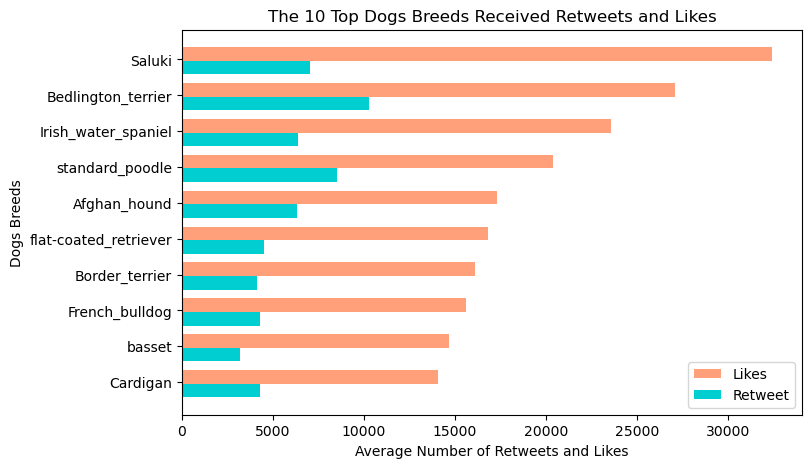

In [62]:
#getting the top 10 dogs breeds that have the highest average retweets and likes
top_dogbreeds = WeRateDogs_df.groupby('dog_breed')[['favorite_count','retweet_count']].mean().sort_values(by=['favorite_count','retweet_count'], ascending=False).iloc[:10]
#sort values for visualization
top_dogbreeds= top_dogbreeds.sort_values(by=['favorite_count','retweet_count'])
#visualize the insight as a bar chart
ind = np.arange(len(top_dogbreeds.index)) #locations of bars
width = 0.38 #width of bars

plt.figure(1, figsize=(8,5))
plt.barh(ind, top_dogbreeds['favorite_count'], width, color='lightsalmon', label='Likes')
plt.barh(ind - width, top_dogbreeds['retweet_count'], width, color='darkturquoise', label='Retweet')
plt.yticks(ind - 0.15,top_dogbreeds.index)
#set the labels
plt.title('The 10 Top Dogs Breeds Received Retweets and Likes')
plt.xlabel('Average Number of Retweets and Likes')
plt.ylabel('Dogs Breeds')
plt.legend()
plt.show();

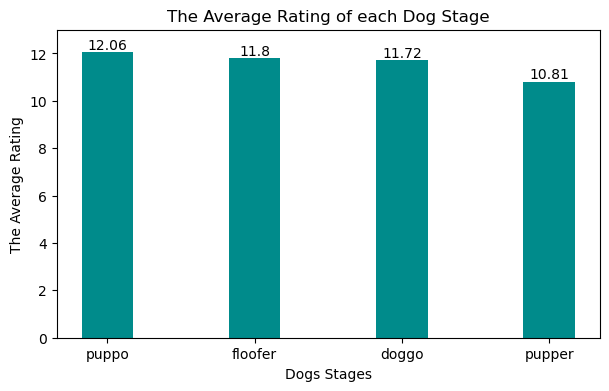

In [63]:
#get average rating based on each dog stage
DogStage_rating = WeRateDogs_df.groupby(['dog_stage'])['rating_numerator'].mean().round(decimals = 2).sort_values(ascending=False).iloc[:10]
#visualize the data
ind2 = np.arange(len(DogStage_rating))
width2 = 0.35
plt.figure(2, figsize=(7,4))
rating_val = plt.bar(ind2, DogStage_rating.values, width2, color='darkcyan')
plt.bar_label(rating_val)
plt.xticks(ind2, DogStage_rating.index)
plt.ylim(0,13)
#set the labels
plt.title('The Average Rating of each Dog Stage')
plt.xlabel('Dogs Stages')
plt.ylabel('The Average Rating')
plt.show();

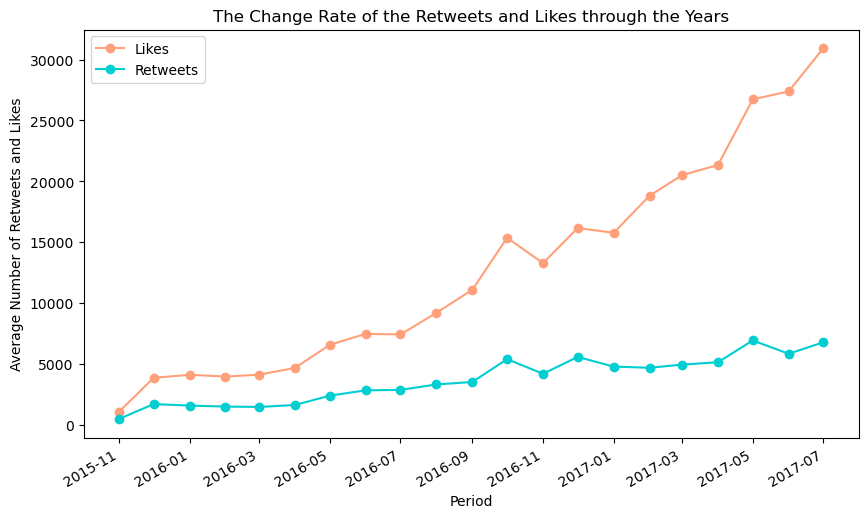

In [64]:
#convert timestamp to date data type to be used in the analysis and visualization
WeRateDogs_df['timestamp'] = pd.to_datetime(WeRateDogs_df['timestamp'])
#extract years and months to use them in the aggregation
WeRateDogs_df['year'] = WeRateDogs_df['timestamp'].dt.year.astype(str)
WeRateDogs_df['month'] = WeRateDogs_df['timestamp'].dt.month.astype(str)
WeRateDogs_df['date'] = pd.to_datetime(WeRateDogs_df['year'] +'-'+ WeRateDogs_df['month'])
WeRateDogs_df.drop(['year', 'month'], axis=1)

#calculate the average retweets and likes for each month
avg_ret_fav = WeRateDogs_df.groupby(WeRateDogs_df['date'])[['favorite_count', 'retweet_count']].mean()

#Visualize our findings
plt.figure(3, figsize=(10,6))
plt.plot_date(avg_ret_fav.index, avg_ret_fav['favorite_count'], linestyle='solid',color='lightsalmon',  label='Likes')
plt.plot_date(avg_ret_fav.index, avg_ret_fav['retweet_count'], linestyle='solid',color='darkturquoise',  label='Retweets')
#set the labels
plt.title('The Change Rate of the Retweets and Likes through the Years')
plt.xlabel('Period')
plt.ylabel('Average Number of Retweets and Likes')
plt.gcf().autofmt_xdate()
plt.legend()
plt.show();
 

## References:
1. [How to counts values through multiple columns](https://stackoverflow.com/questions/32589829/how-to-get-value-counts-for-multiple-columns-at-once-in-pandas-dataframe)
2. [How to run a loop through a dataframe](https://www.geeksforgeeks.org/different-ways-to-iterate-over-rows-in-pandas-dataframe/)
3. [How to combine multiple columns to one](https://www.statology.org/pandas-coalesce/)
